**Important : make sure the size set here is the same than in pkl_to_train-test**

# Training

In [ ]:
size = 224

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load train/test data
X_train =np.load('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\X_train_rgb.npy')
X_test =np.load('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\X_test_rgb.npy')
train_Y_one_hot =np.load('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\y_train_rgb.npy')
test_Y_one_hot =np.load('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\y_test_rgb.npy')

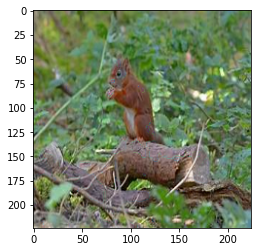

In [11]:
#impression image 
num = 26
img = X_train[num]
plt.imshow(img)

In [12]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

In [13]:
num_classes = train_Y_one_hot.shape[1]
print(num_classes)

10


In [14]:
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11, 11),strides=(4,4),activation='linear',input_shape=(size,size,X_train.shape[3])))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding='same'))
model.add(Conv2D(256, (5, 5), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding='same'))
model.add(Conv2D(384, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(384, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2),padding='same'))
model.add(Flatten())
#reseau de neurone "classique" pour la deriere couche cachee
model.add(Dense(4096, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
#couche de sortie
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 23, 23, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                    

In [17]:
model.fit(X_train, train_Y_one_hot, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, test_Y_one_hot))

Epoch 1/10
164/164 [==============================] - 1095s 7s/step - loss: 74.7854 - accuracy: 0.1779 - val_loss: 2.1126 - val_accuracy: 0.2840
Epoch 2/10
  7/164 [>.............................] - ETA: 16:17 - loss: 2.1880 - accuracy: 0.2355

Text(0.5, 0, 'epoch')

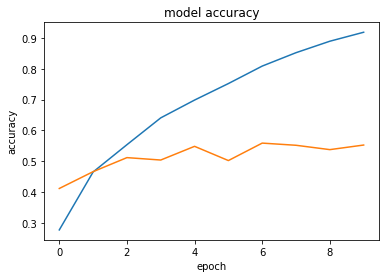

In [ ]:
#graph accuracy vs val_accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

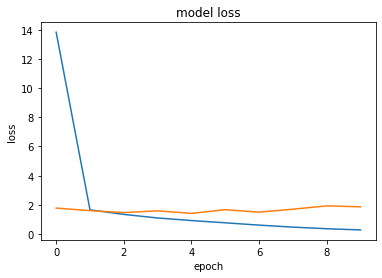

In [ ]:
#graph loss vs val_loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
#save model
model.save('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\model_rgb_80px.h5')

# Testing

In [ ]:
model = tensorflow.keras.models.load_model('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\model_rgb.h5')

In [ ]:
eval = model.evaluate(X_test, test_Y_one_hot, verbose=1)

164/164 [==============================] - 10s 58ms/step - loss: 0.5022 - accuracy: 0.8780


In [ ]:
target_names = le.inverse_transform(np.arange(num_classes))
print(target_names)

['butterfly' 'cat' 'chicken' 'cow' 'dog' 'elephant' 'horse' 'sheep'
 'spider' 'squirrel']


In [ ]:
#prediction
pred = model.predict(X_test)
#see results by label
pred_label = np.argmax(pred, axis=1)
#print(pred_label)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_label, target_names=target_names))

              precision    recall  f1-score   support

   butterfly       0.64      0.64      0.64       422
         cat       0.33      0.23      0.28       342
     chicken       0.45      0.74      0.56       594
         cow       0.59      0.34      0.43       365
         dog       0.55      0.62      0.58       977
    elephant       0.66      0.34      0.45       310
       horse       0.63      0.50      0.56       521
       sheep       0.50      0.42      0.45       390
      spider       0.71      0.71      0.71       942
    squirrel       0.40      0.47      0.43       373

    accuracy                           0.55      5236
   macro avg       0.55      0.50      0.51      5236
weighted avg       0.56      0.55      0.55      5236

